**Objective**: Build an XGBoost model for predicting heart disease and experiment with hyperparameter tuning to improve its performance.

Dataset: [Heart Disease UCI](https://archive.ics.uci.edu/dataset/45/heart+disease)

# Task 1: Data Loading and Exploration
1. Load the Heart Disease UCI dataset.
2. Explore the dataset to understand its structure and features.
3. Split the data into training and testing sets.

In [ ]:
import pandas as pd
url="https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets


print(heart_disease.metadata)

print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Task 2: Data Preprocessing
1. Handle missing values if any.
2. Encode categorical variables using appropriate methods.
3. Standardize or normalize numerical features if necessary.

In [ ]:
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)
X_train, X_test=X_train.align(X_test, join='outer', axis=1, fill_value=0)

# Task 3: Initial XGBoost Model
1. Build an initial XGBoost model using default hyperparameters.
2. Train the model on the training set and evaluate its performance on the testing set.
3. Note down the accuracy and any other relevant metrics.

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
xgb_model=XGBClassifier(random_state=42)
label_encoder=LabelEncoder()
Y_train=label_encoder.fit_transform(Y_train)
Y_test=label_encoder.fit_transform(Y_test)
xgb_model.fit(X_train,Y_train)
preds=xgb_model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score
xgb_accuracy=accuracy_score(Y_test, preds)
print("accuracy:", xgb_accuracy)

accuracy: 0.47540983606557374


# Task 4: Hyperparameter Tuning
1. Experiment with hyperparameter tuning to improve model performance.
2. Adjust hyperparameters such as learning_rate, n_estimators, max_depth, etc.
3. Use techniques like cross-validation to find optimal hyperparameters.
4. Train and evaluate the model with the tuned hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV
params_grid={
    'n_estimators':[5,10,15],
    'max_depth':[10,20],
    'eta':[0.1,0.3,0.5]
}
grid_search=GridSearchCV(xgb_model,params_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,Y_train)
print("best params:",grid_search.best_params_)
preds=grid_search.best_estimator_.predict(X_test)
GS_accuracy=accuracy_score(Y_test, preds)
print("accuracy:", GS_accuracy)

best params: {'eta': 0.5, 'max_depth': 20, 'n_estimators': 10}
accuracy: 0.45901639344262296


In [ ]:
#by setting a non-null learning rate we decrease the accuracy score, so better not to set it
from sklearn.model_selection import GridSearchCV
params_grid={
    'n_estimators':[5,10,15],
    'max_depth':[10,20]
}
grid_search=GridSearchCV(xgb_model,params_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,Y_train)
print("best params:",grid_search.best_params_)
preds=grid_search.best_estimator_.predict(X_test)
GS_accuracy=accuracy_score(Y_test, preds)
print("accuracy:", GS_accuracy)

best params: {'max_depth': 10, 'n_estimators': 15}
accuracy: 0.4918032786885246


# Task 5: Feature Importance
1. Explore feature importance using the **feature_importances_** attribute of the trained XGBoost model.
2. Identify the most important features for heart disease prediction.

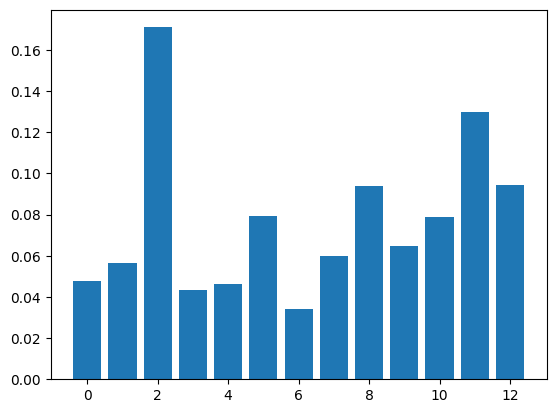

In [ ]:
from matplotlib import pyplot
pyplot.bar(range(len(grid_search.best_estimator_.feature_importances_)), grid_search.best_estimator_.feature_importances_)
pyplot.show()

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 8.4 MB/s eta 0:00:00


[16:41:49] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


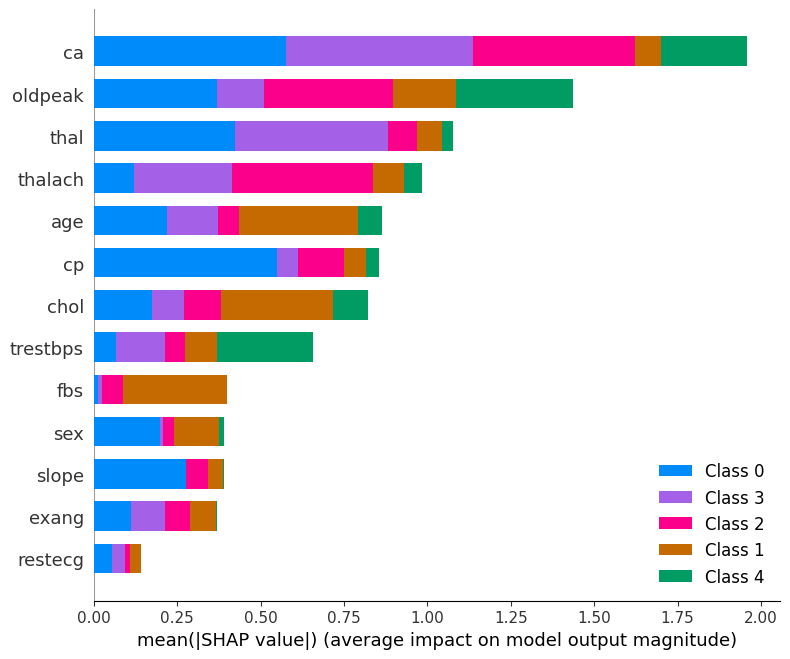

In [ ]:
import shap

explainer = shap.TreeExplainer(grid_search.best_estimator_)
shap_values = explainer.shap_values(X_test)
feature_names = X_train.columns.values
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type='bar')

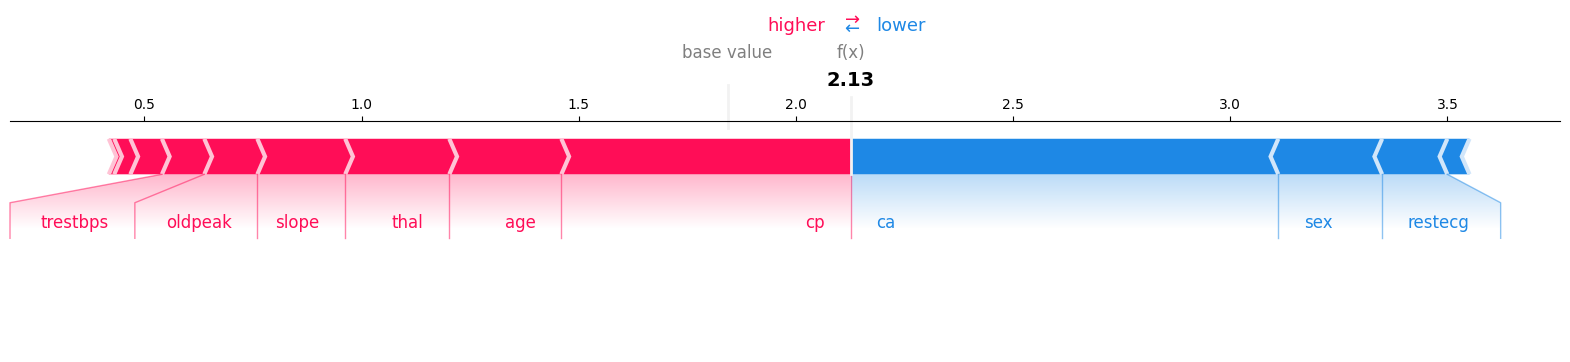

In [ ]:
instance_index = 0
instance = X_test.values[instance_index]
shap_values_instance = explainer.shap_values(instance.reshape(1,-1))
class_to_explain = 0
shap_values_instance_class = shap_values_instance[class_to_explain]

shap.force_plot(explainer.expected_value[class_to_explain], shap_values_instance_class,
                feature_names=feature_names, matplotlib=True)

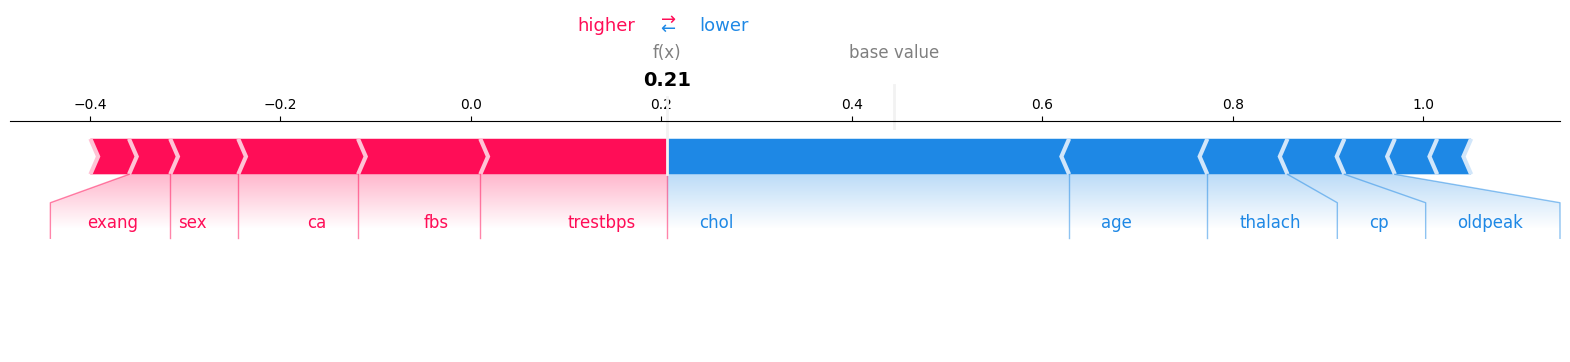

In [ ]:
instance_index = 1
instance = X_test.values[instance_index]
shap_values_instance = explainer.shap_values(instance.reshape(1,-1))
class_to_explain = 1
shap_values_instance_class = shap_values_instance[class_to_explain]

shap.force_plot(explainer.expected_value[class_to_explain], shap_values_instance_class,
                feature_names=feature_names, matplotlib=True)

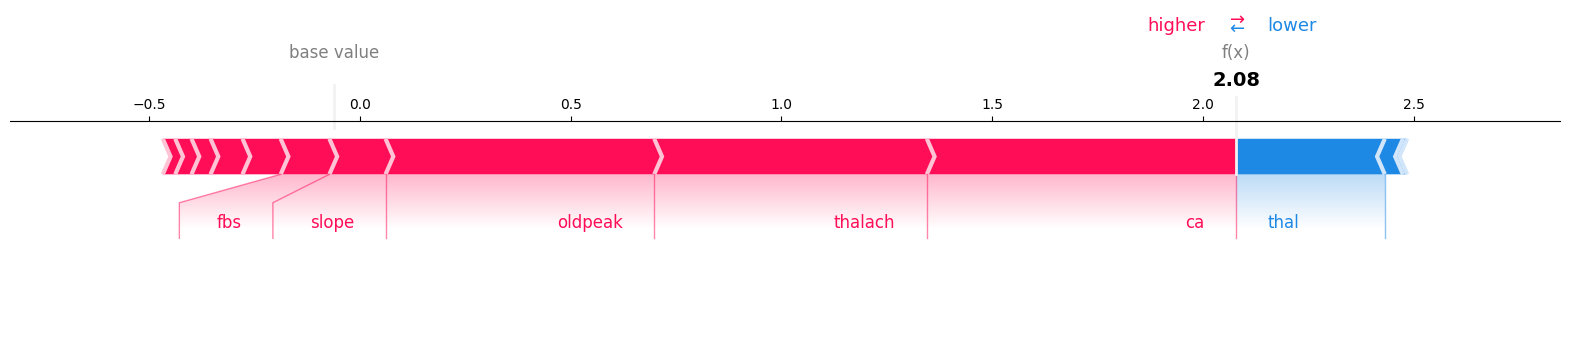

In [ ]:
instance_index = 2
instance = X_test.values[instance_index]
shap_values_instance = explainer.shap_values(instance.reshape(1,-1))
class_to_explain = 2
shap_values_instance_class = shap_values_instance[class_to_explain]

shap.force_plot(explainer.expected_value[class_to_explain], shap_values_instance_class,
                feature_names=feature_names, matplotlib=True)

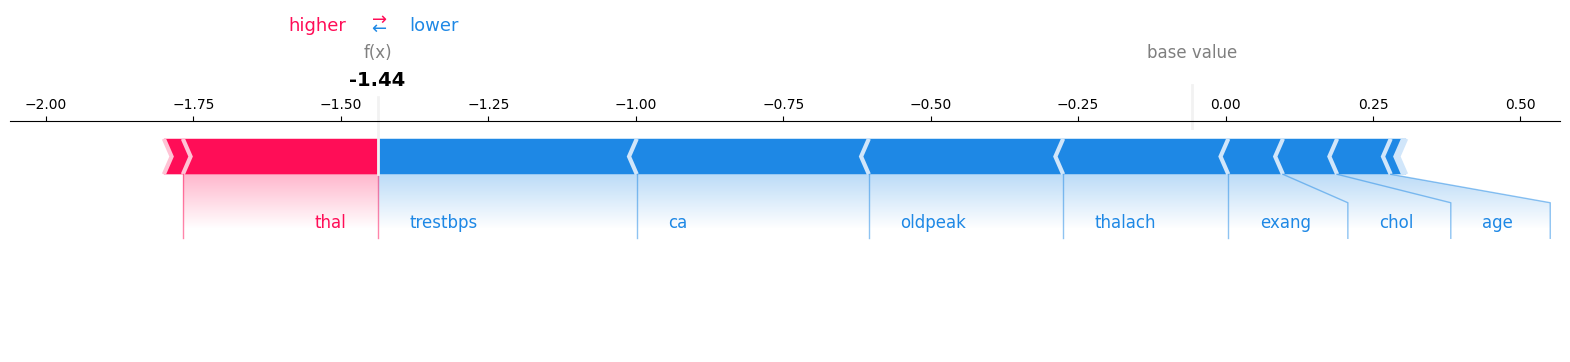

In [ ]:
instance_index = 3
instance = X_test.values[instance_index]
shap_values_instance = explainer.shap_values(instance.reshape(1,-1))
class_to_explain = 3
shap_values_instance_class = shap_values_instance[class_to_explain]

shap.force_plot(explainer.expected_value[class_to_explain], shap_values_instance_class,
                feature_names=feature_names, matplotlib=True)

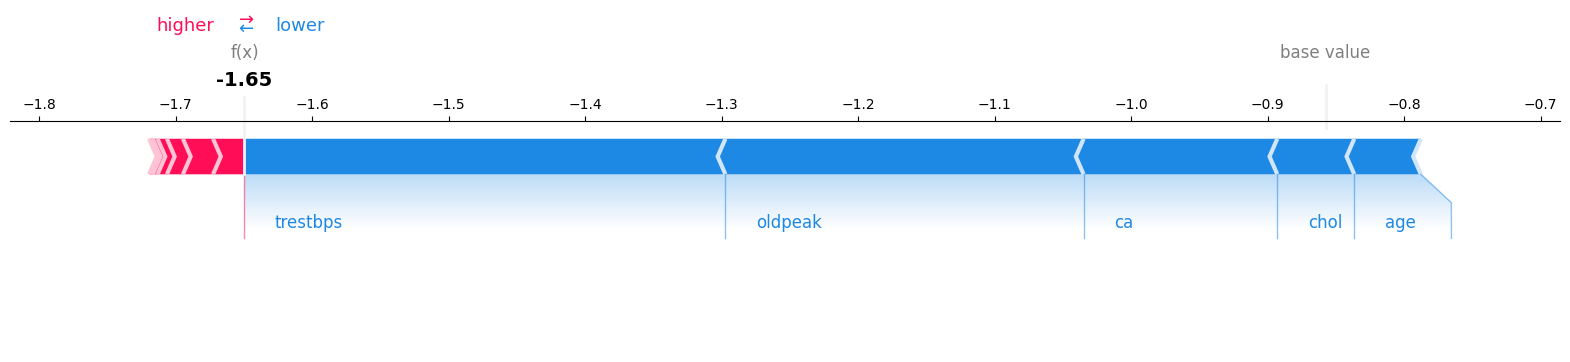

In [ ]:
instance_index = 4
instance = X_test.values[instance_index]
shap_values_instance = explainer.shap_values(instance.reshape(1,-1))
class_to_explain = 4
shap_values_instance_class = shap_values_instance[class_to_explain]

shap.force_plot(explainer.expected_value[class_to_explain], shap_values_instance_class,
                feature_names=feature_names, matplotlib=True)

# Task 6: Model Evaluation
1. Compare the performance metrics of the initial model and the tuned model.
2. Visualize the improvement achieved in a clear and concise manner.
3. Discuss the impact of hyperparameter tuning and feature importance on model performance.

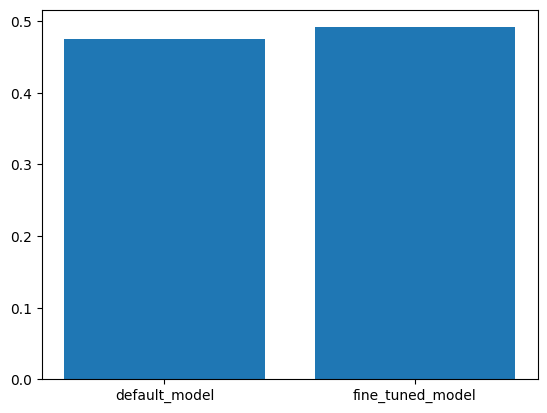

In [ ]:
import matplotlib.pyplot as plt
results=[xgb_accuracy,GS_accuracy]
names=['default_model', 'fine_tuned_model']

plt.bar(names,results)
plt.show()